In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import math

We can create a dataframe from a python dictionary.

It is observed that the number of elements in each list of the dictionary must be the same. Otherwise, pandas throws an error.


In [172]:
data = {
    'Name': ['Mark', 'John', 'Ben', 'Anomaly'],
    'Age': [25, 46, 32, 55],
    'City': ['London', 'Berlin', 'Berlin', 'London']
}

df = pd.DataFrame(data)

df

,Name,Age,City
0,Mark,25,London
1,John,46,Berlin
2,Ben,32,Berlin
3,Anomaly,55,London


df.head(n) displays the first n rows of the dataframe


In [173]:
df.head(2)

,Name,Age,City
0,Mark,25,London
1,John,46,Berlin


df.tail(n) displays the last n rows


In [174]:
df.tail(1)

,Name,Age,City
3,Anomaly,55,London


df.shape is an attributre that stores the dimension of the dataframe as a tuple.


In [175]:
df.shape

(4, 3)

df.info() gives us information on the dataframe, its columns and their datatypes.


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


df.describe generates statitical info on the dataframe, focusing only on the numerical columns.


In [177]:
df.describe()

,Age
count,4.000000
mean,39.500000
std,13.527749
min,25.000000
25%,30.250000
50%,39.000000
75%,48.250000
max,55.000000


In [178]:
# Access a specific column
print(df['Name'])

# Access a specific row or a set of rows by passign the indices as a list
print(df.loc[[1, 3]])

# Access a specific cell
df.at[2, 'Name'] = None
df

0       Mark
1       John
2        Ben
3    Anomaly
Name: Name, dtype: object
      Name  Age    City
1     John   46  Berlin
3  Anomaly   55  London


,Name,Age,City
0,Mark,25,London
1,John,46,Berlin
2,None,32,Berlin
3,Anomaly,55,London


df.isnull() identifies the missing values

df.fillna(<>) fills the passed parameter into all the missing cells.


In [179]:
df.isnull()

df.fillna('Filler name', inplace=True)

df

,Name,Age,City
0,Mark,25,London
1,John,46,Berlin
2,Filler name,32,Berlin
3,Anomaly,55,London


In [180]:
values = [1, 2, 3, 4]
df['new column'] = values
df

,Name,Age,City,new column
0,Mark,25,London,1
1,John,46,Berlin,2
2,Filler name,32,Berlin,3
3,Anomaly,55,London,4


In [181]:
df.drop('new column', axis=1, inplace=True)
df

,Name,Age,City
0,Mark,25,London
1,John,46,Berlin
2,Filler name,32,Berlin
3,Anomaly,55,London


similar to "select from df df[Age] where Age > 25


### Aggregate functions


We are grouping by city and performing average on age, this average can be for multiple attributes, and we can also group by several columns


In [182]:
avg_age_by_city = df.groupby('City')['Age'].mean()
avg_age_by_city

City
Berlin    39.0
London    40.0
Name: Age, dtype: float64

In [183]:
df

,Name,Age,City
0,Mark,25,London
1,John,46,Berlin
2,Filler name,32,Berlin
3,Anomaly,55,London


<Axes: xlabel='Name'>

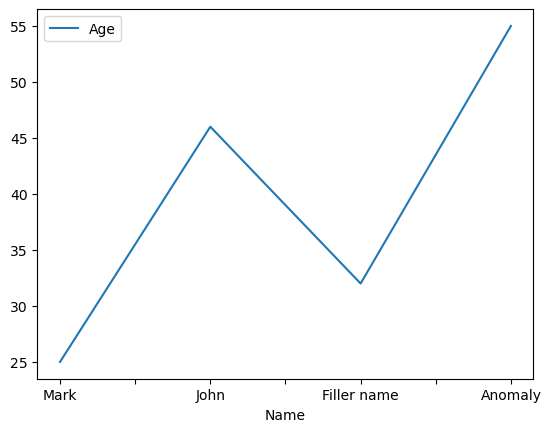

In [184]:
df.plot(x='Name', y='Age', kind='line')

In [185]:
filtered_df = df[df['Age'] > 25]
filtered_df

,Name,Age,City
1,John,46,Berlin
2,Filler name,32,Berlin
3,Anomaly,55,London


# Working with bigger dataframes


We import the diabetes dataset from sklearn. The target column is predicted using the data, and we are adding that column to the dataframe for plotting and other purposes.


In [186]:
data_dict = datasets.load_diabetes(as_frame=True)

df = data_dict['data']
target = data_dict['target']
df['target'] = target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [187]:
random_integers = [random.randint(10**11, (10**12)-1) for _ in range(442)]
# random_integers =

names = [
    "Liam", "Emma", "Noah", "Olivia", "Ethan", "Ava", "Aiden", "Sophia", "Jackson", "Isabella",
    "Lucas", "Mia", "Oliver", "Charlotte", "Caden", "Amelia", "Mateo", "Harper", "Muhammad", "Evelyn",
    "Grayson", "Abigail", "Mason", "Emily", "Logan", "Elizabeth", "Sebastian", "Sofia", "Alexander", "Avery",
    "Daniel", "Ella", "Henry", "Scarlett", "Matthew", "Grace", "Samuel", "Chloe", "David", "Victoria",
    "Carter", "Riley", "Wyatt", "Aria", "John", "Lily", "Owen", "Zoey", "Dylan", "Penelope",
    "Luke", "Layla", "Jack", "Nora", "James", "Lila", "Gabriel", "Ellie", "Isaac", "Hazel",
    "Benjamin", "Luna", "Ryan", "Maya", "William", "Aubrey", "Leo", "Aurora", "Caleb", "Stella",
    "Lucas", "Hannah", "Julian", "Addison", "Grayson", "Savannah", "Leo", "Brooklyn", "Luke", "Robert",
    "Lucy", "Benjamin", "Natalie", "Joshua", "Zoe", "Nathan", "Leah", "Adam", "Audrey",
    "Samuel", "Claire", "Joseph", "Eleanor", "Hunter", "Skylar", "Isaac", "Naomi", "Anthony", "Samantha",
    "Isaiah", "Zoe", "Eli", "Ellie", "Aaron", "Stella", "Thomas", "Violet", "Caleb", "Aurora",
    "Andrew", "Bella", "Cooper", "Brooklyn", "Charlie", "Elena", "David", "Emilia", "Luke", "Everly",
    "Samuel", "Peyton", "Christian", "Scarlett", "Isaac", "Aria", "Henry", "Penelope", "Owen", "Layla",
    "Wyatt", "Aubrey", "Jack", "Claire", "Leo", "Skylar", "Julian", "Riley", "Michael", "Isabella",
    "Daniel", "Zoe", "Matthew", "Lucy", "Joseph", "Ava", "Samuel", "Harper", "William", "Olivia",
    "Anthony", "Mia", "Benjamin", "Amelia", "Elijah", "Evelyn", "Andrew", "Sofia", "James", "Grace",
    "Joshua", "Lily", "Liam", "Victoria", "Ethan", "Scarlett", "Michael", "Emily", "Alexander", "Aria",
    "Daniel", "Bella", "William", "Aurora", "Carter", "Penelope", "Benjamin", "Claire", "Henry", "Emily",
    "Samuel", "Scarlett", "Ethan", "Ava", "William", "Amelia", "Daniel", "Elizabeth", "James", "Chloe",
    "Benjamin", "Lily", "Christopher", "Grace", "Jack", "Layla", "Alexander", "Ella", "Joseph", "Victoria",
    "Liam", "Harper", "Carter", "Sofia", "William", "Mia", "Daniel", "Scarlett", "James", "Aria",
    "Henry", "Penelope", "Alexander", "Bella", "Christian", "Aurora", "David", "Emily", "Michael", "Ava",
    "Joseph", "Elizabeth", "Liam", "Chloe", "Christopher", "Lily", "Samuel", "Grace", "Benjamin", "Layla",
    "James", "Ella", "Ethan", "Victoria", "William", "Harper", "Carter", "Mia", "Daniel", "Scarlett",
    "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella", "Christian", "Aurora", "David", "Emily",
    "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe", "Samuel", "Lily", "Jack", "Grace",
    "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Daniel", "Harper", "James", "Mia",
    "Ethan", "Scarlett", "Benjamin", "Aria", "Henry", "Penelope", "Samuel", "Bella", "David", "Aurora",
    "Christian", "Emily", "Michael", "Ava", "Joseph", "Elizabeth", "Liam", "Chloe", "Christopher", "Lily",
    "Samuel", "Grace", "Benjamin", "Layla", "James", "Ella", "Ethan", "Victoria", "William", "Harper",
    "Carter", "Mia", "Daniel", "Scarlett", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella",
    "Christian", "Aurora", "David", "Emily", "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe",
    "Samuel", "Lily", "Jack", "Grace", "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Emily",
    "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe", "Samuel", "Lily", "Jack", "Grace",
    "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Daniel", "Harper", "James", "Mia",
    "Ethan", "Scarlett", "Benjamin", "Aria", "Henry", "Penelope", "Samuel", "Bella", "David", "Aurora",
    "Christian", "Emily", "Michael", "Ava", "Joseph", "Elizabeth", "Liam", "Chloe", "Christopher", "Lily",
    "Samuel", "Grace", "Benjamin", "Layla", "James", "Ella", "Ethan", "Victoria", "William", "Harper",
    "Carter", "Mia", "Daniel", "Scarlett", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella",
    "Christian", "Aurora", "David", "Emily", "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe",
    "Samuel", "Lily", "Jack", "Grace", "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella",
    "Christian", "Aurora", "David", "Emily", "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe",
    "Samuel", "Lily", "Jack", "Grace", "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella"]

In [188]:
df['Name of Patient'] = names
df['Patient Aadhaar Number'] = random_integers

In [189]:
df.loc[1,'s2'] = None
df.loc[2,'bp'] = None
df.loc[5,'Patient Aadhaar Number'] = None
df.loc[96, 's2'] = None
df.loc[1,'sex'] = None

In [190]:
df['sex'].isnull().sum()

1

In [191]:
def figure_plot(df, variable, target):
    plt.figure(figsize=(20,7))

    # histogram
    plt.subplot(1,4,1)
    sns.histplot(df[variable], kde=True, color='r')
    plt.title('Histogram')

    # scatterplot
    plt.subplot(1,4,2)
    plt.scatter(df[variable], df[target], color='pink')
    plt.title('Scatterplot')

    # barplot
    plt.subplot(1,4,3)
    sns.barplot(x = target, y = variable, data = df)
    plt.title('Barplot')

    plt.show()

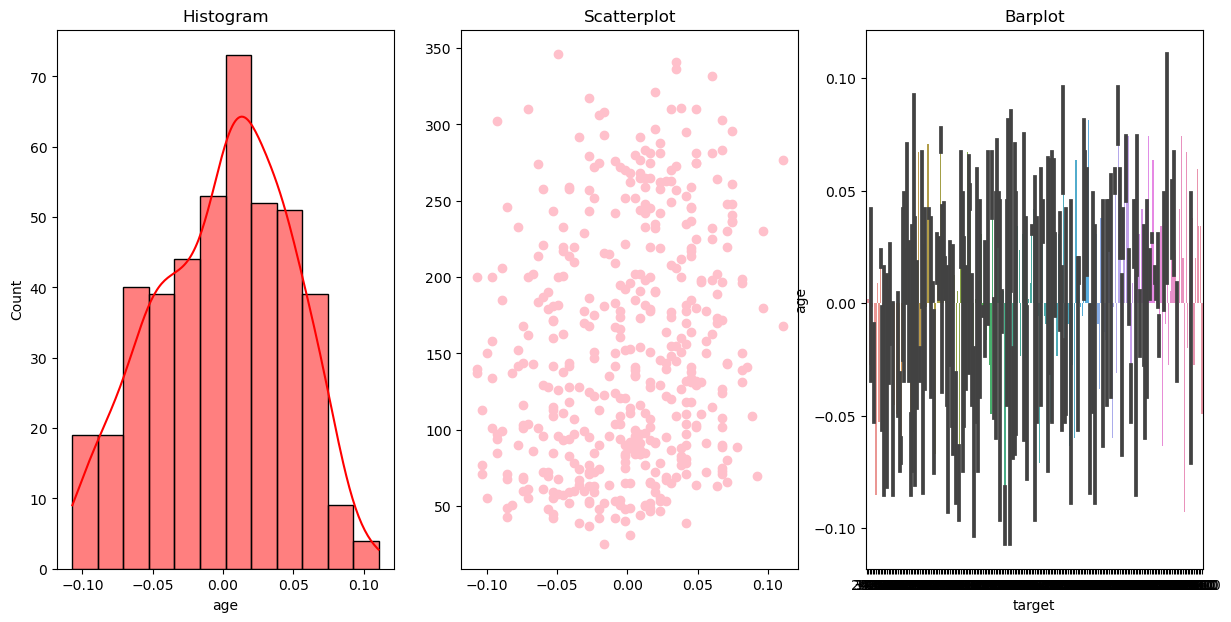

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


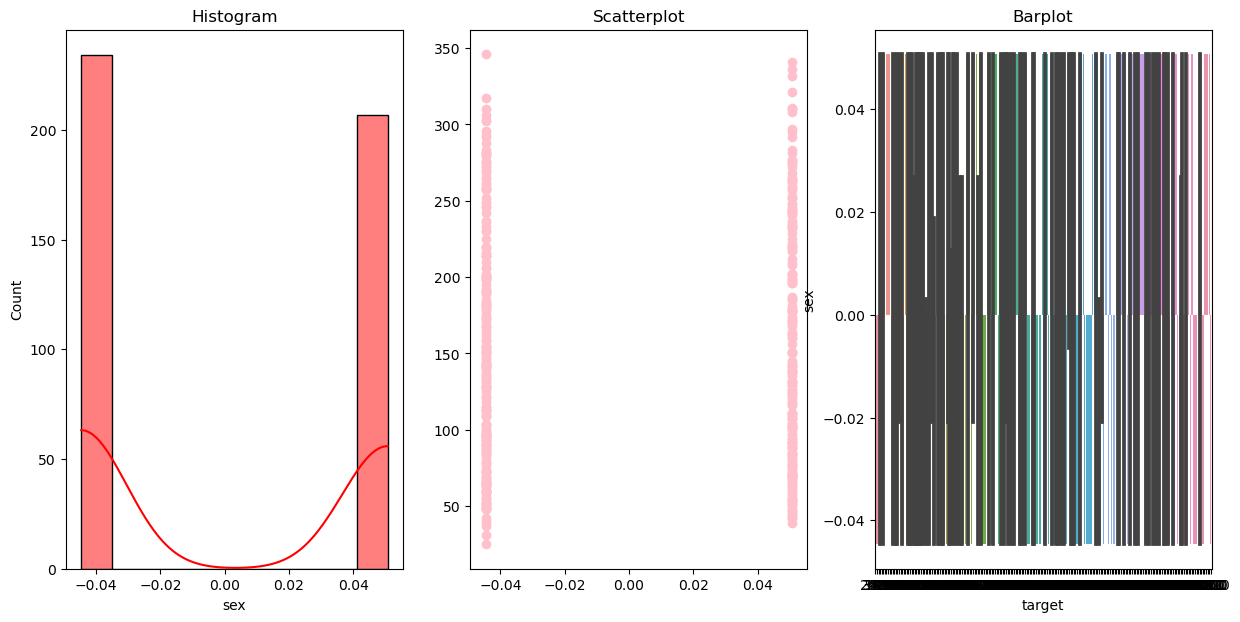

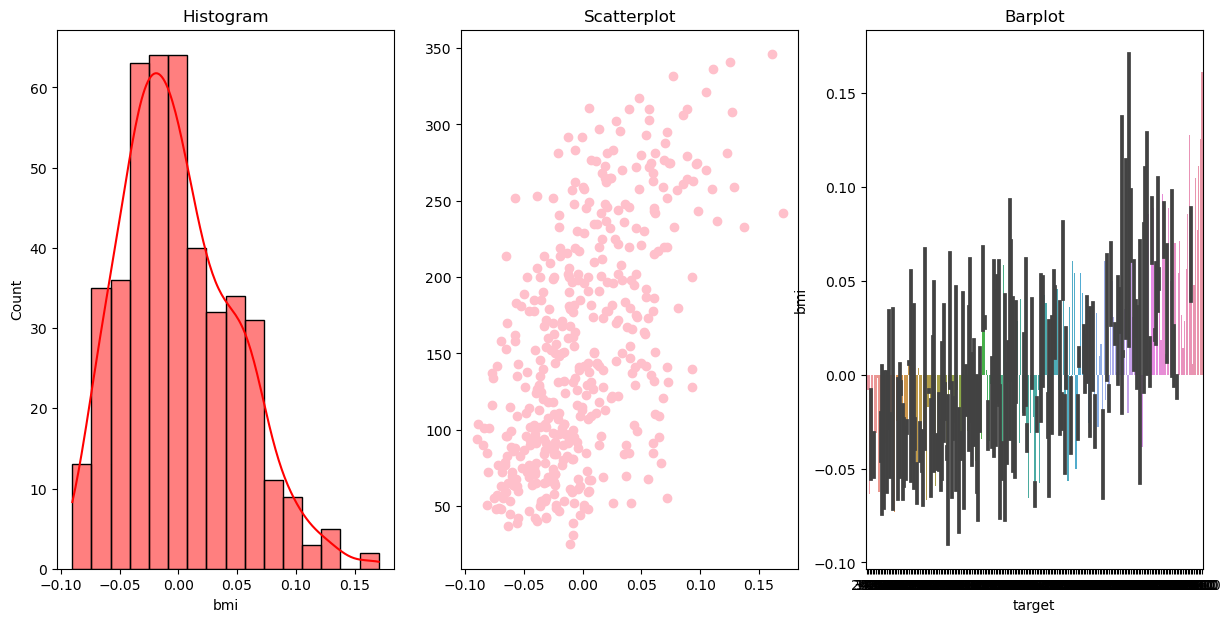

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


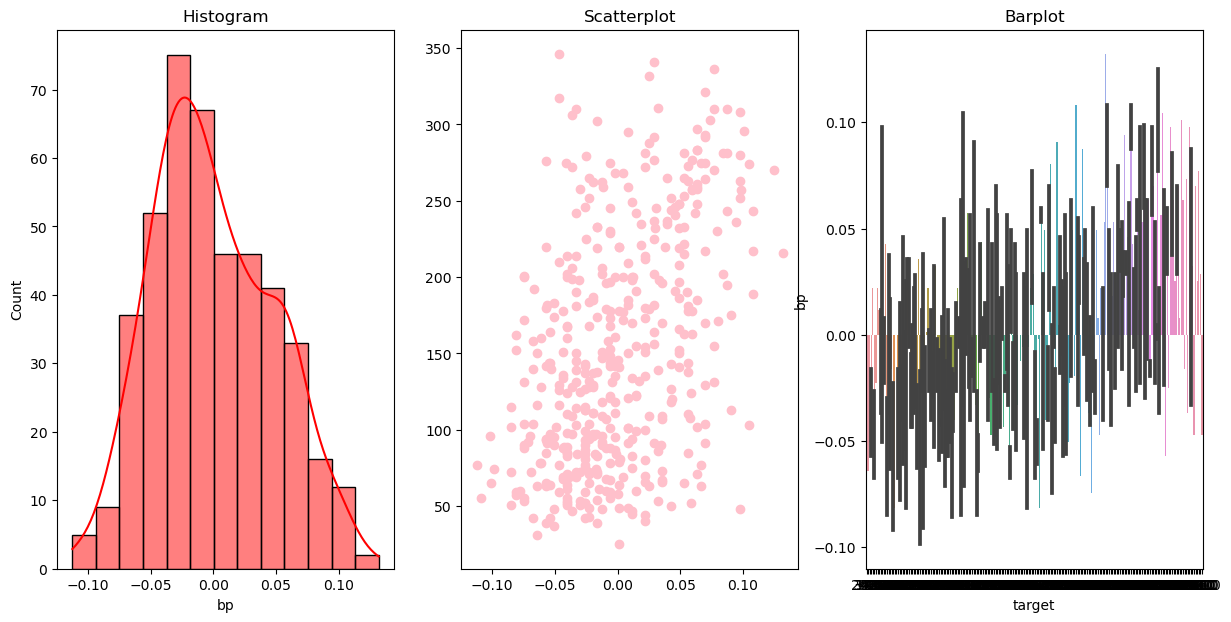

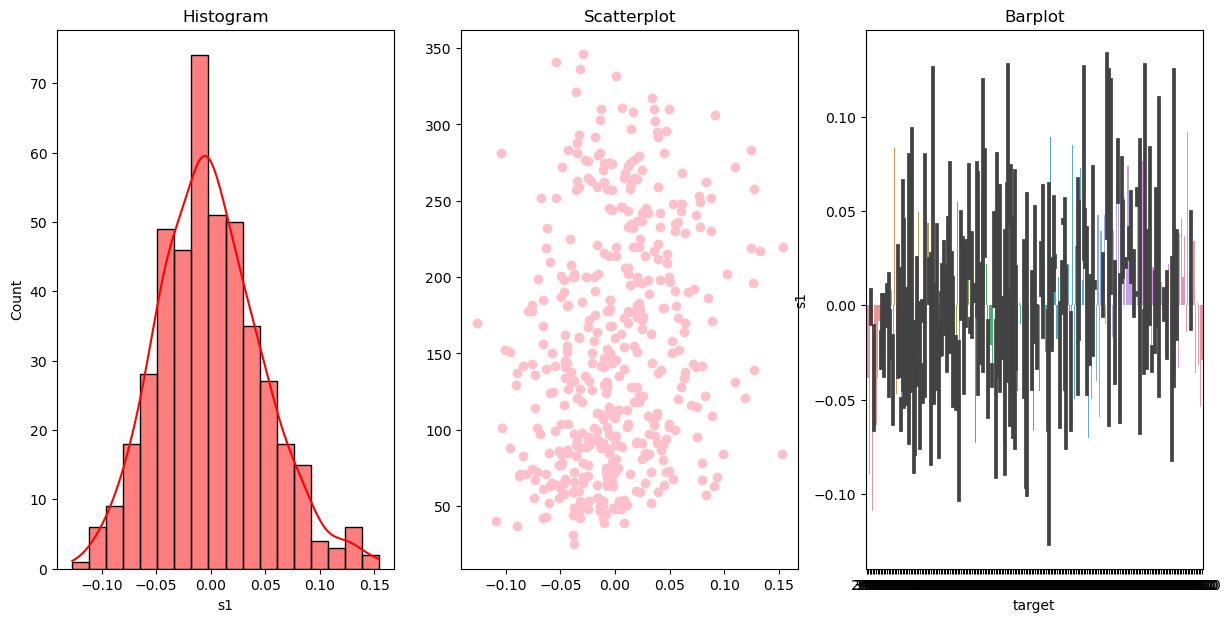

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


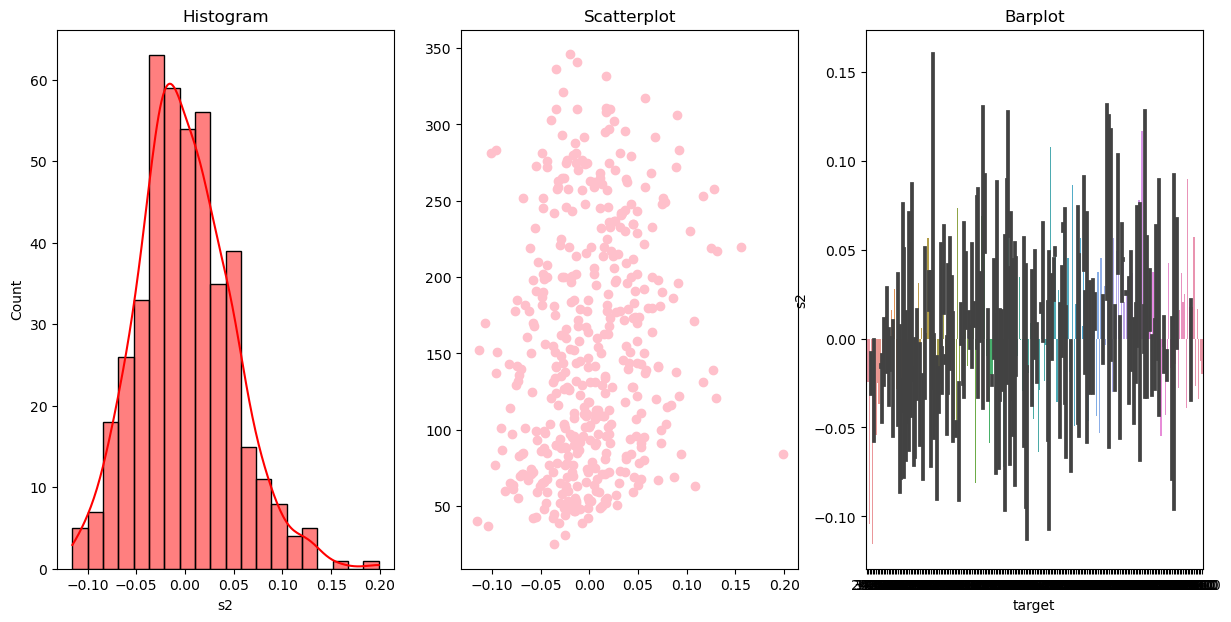

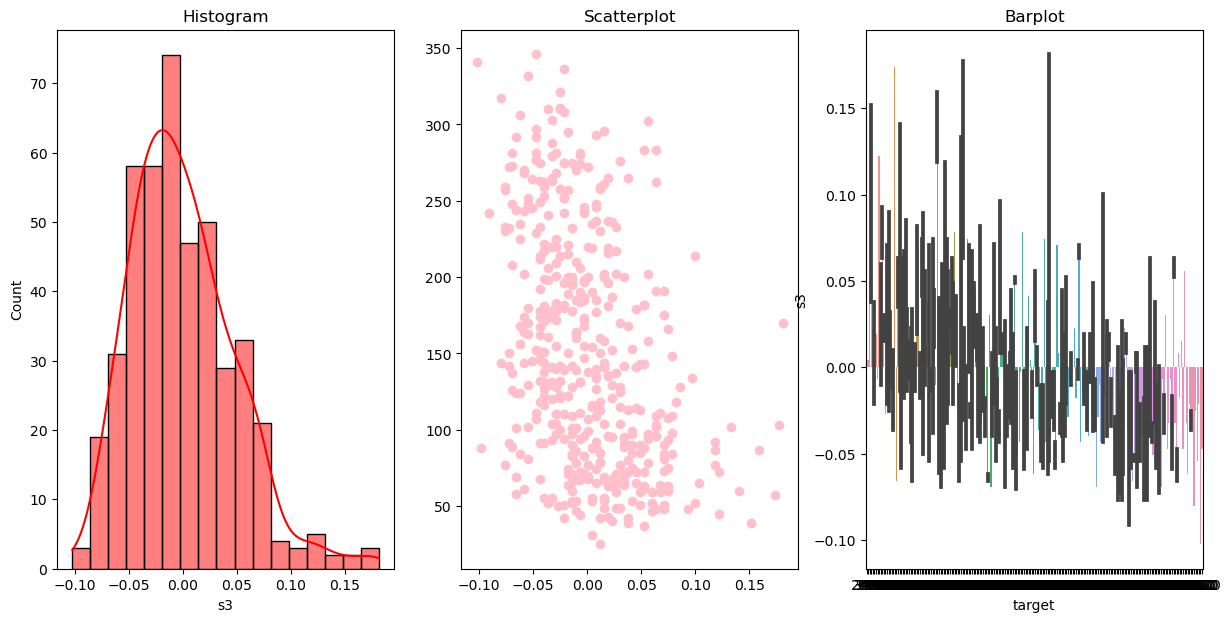

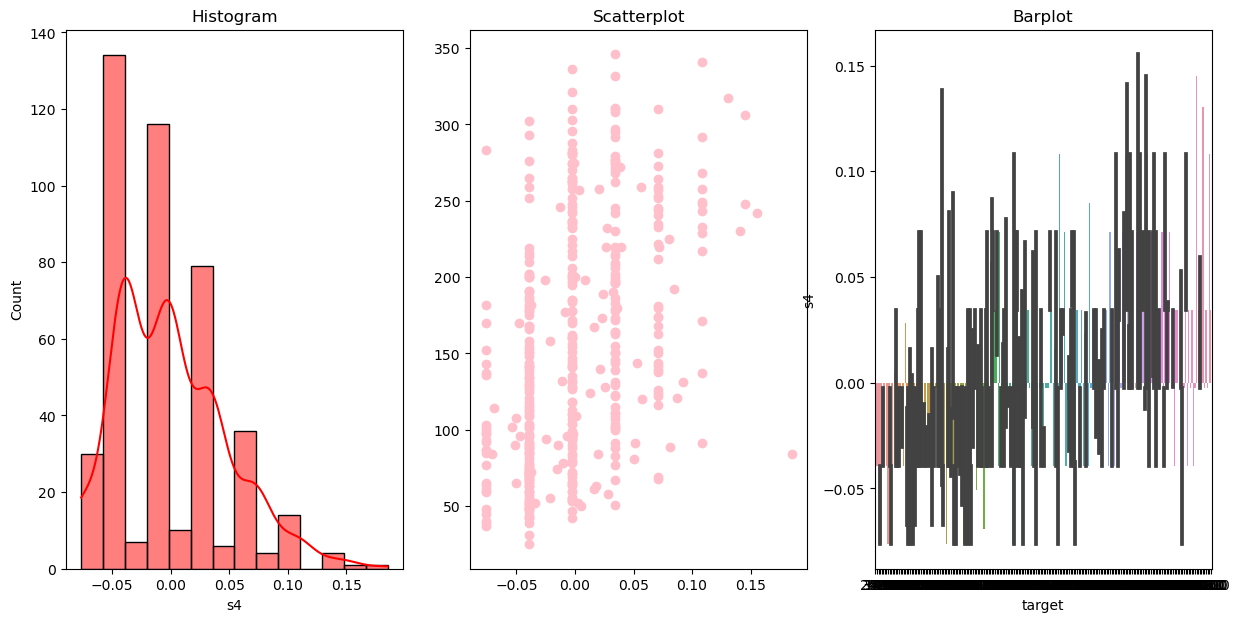

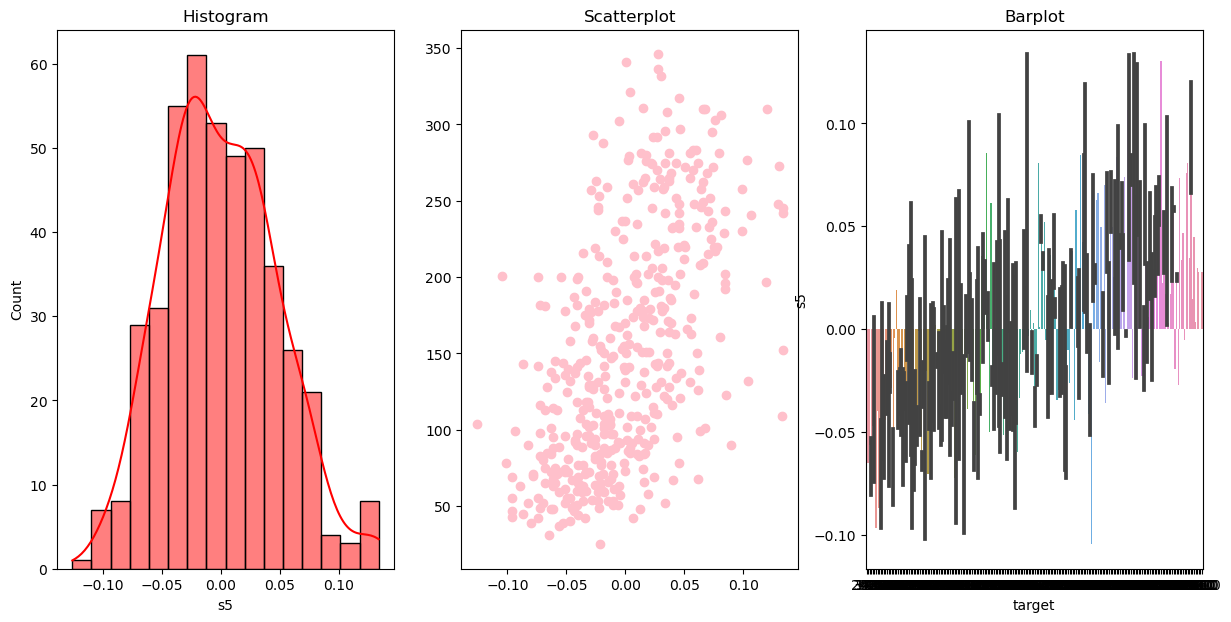

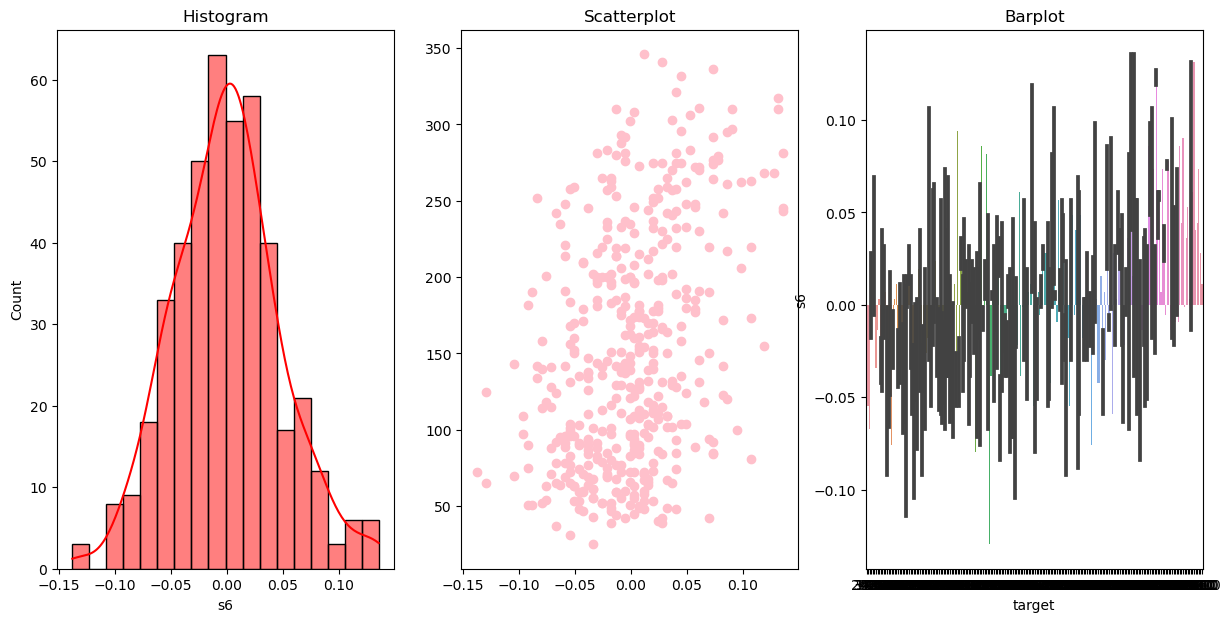

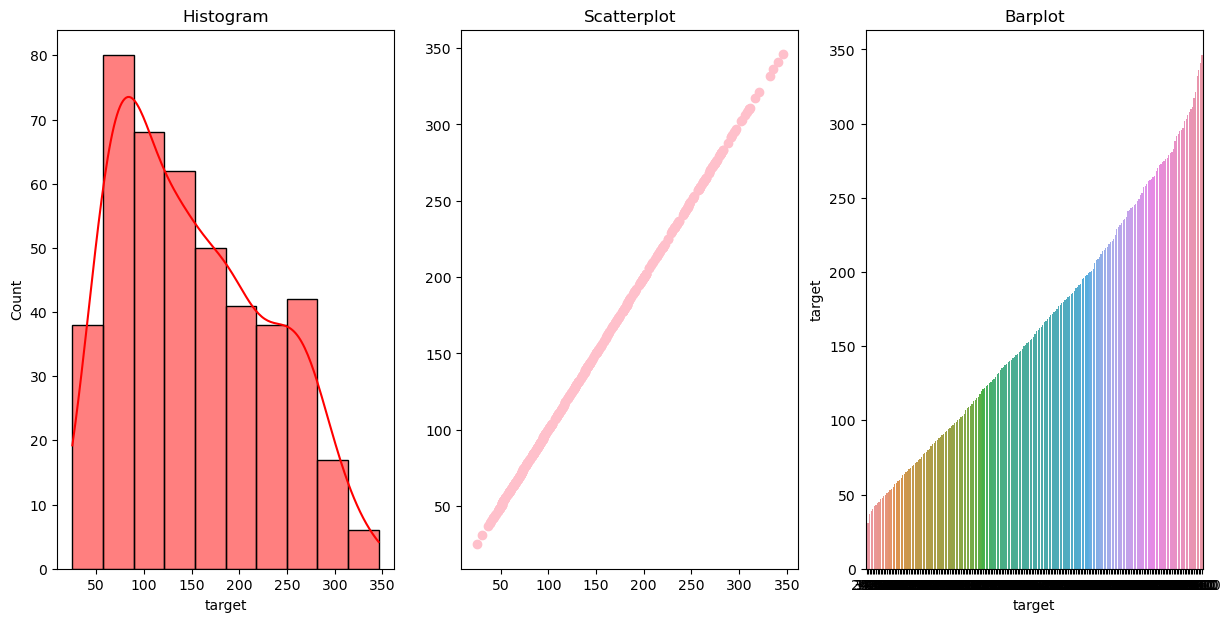

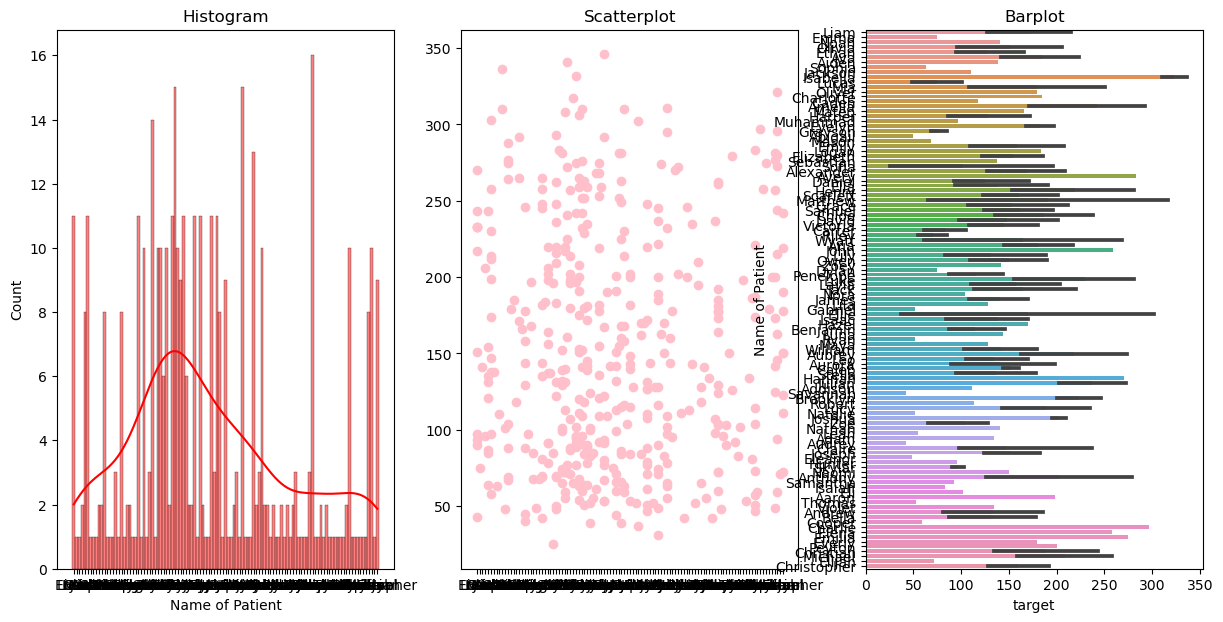

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


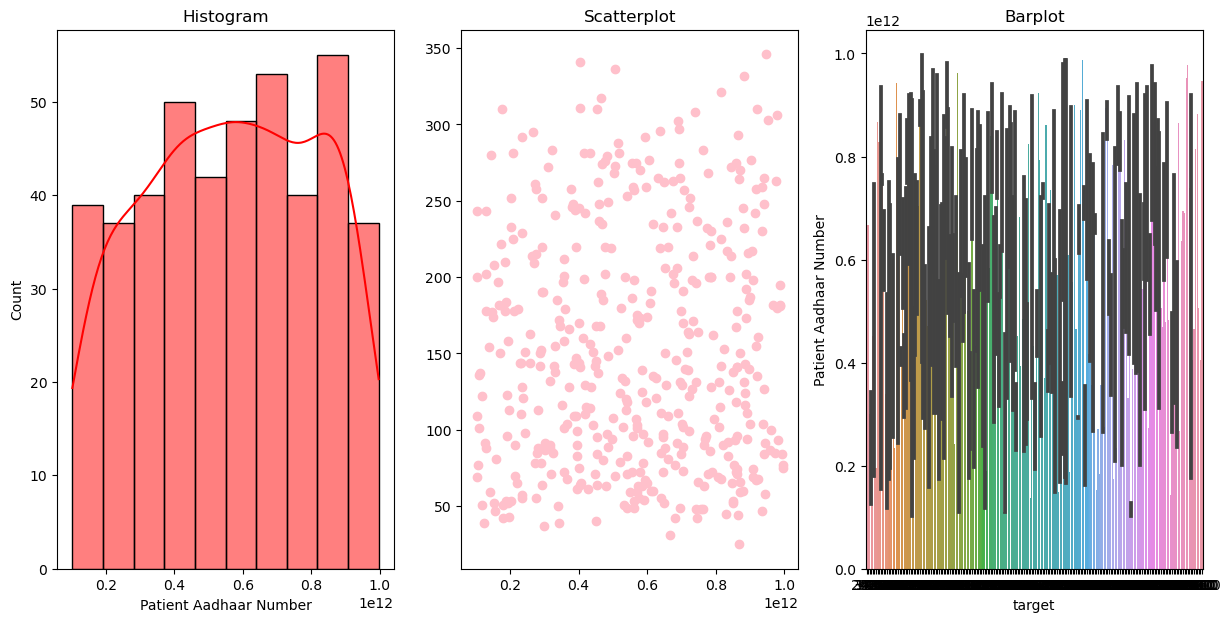

In [192]:
for col in df:
    figure_plot(df, col, 'target')

plt.hist(df[column], bins, log=Boolean, align, color, edge)

bins = number of divisions, can be a number to divide equally into that many bins, or a custom list

log = takes care of the range of the x and y axes, when the data has outliers

(array([[ 26.,  52.,  59.,  77., 106.,  70.,  46.,   6.,   0.,   0.],
        [  0.,   0., 234.,   0.,   0., 207.,   0.,   0.,   0.,   0.],
        [  8.,  51.,  96., 104.,  73.,  51.,  37.,  15.,   5.,   2.]]),
 array([-0.10722563, -0.07944755, -0.05166946, -0.02389137,  0.00388671,
         0.0316648 ,  0.05944288,  0.08722097,  0.11499905,  0.14277714,
         0.17055523]),
 <a list of 3 BarContainer objects>)

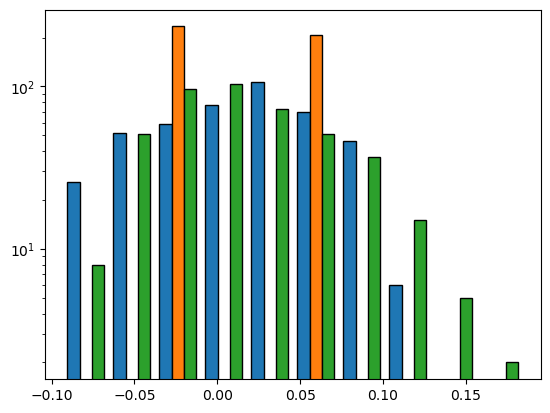

In [193]:
plt.hist(df[['age', 'sex', 'bmi']], bins=10, log=True, align='right', edgecolor = 'black')

### Bar plots

<BarContainer object of 442 artists>

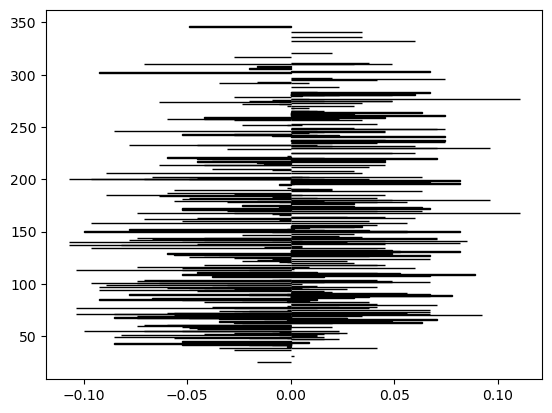

In [194]:
plt.barh(df['target'], df['age'], edgecolor='black', height=0.3)

## Stacked bar plots

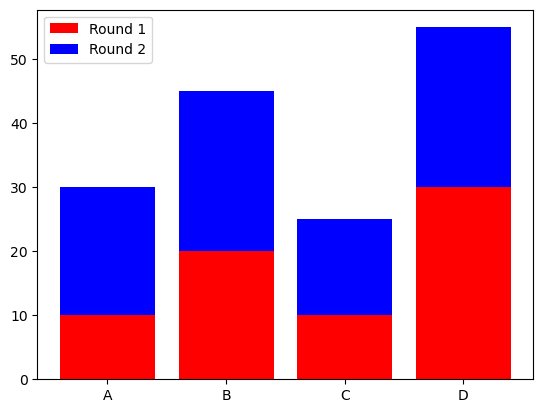

In [195]:
x = np.array(['A', 'B', 'C', 'D'])
y1 = np.array([10,20,10,30])
y2 = np.array([20,25,15,25])

plt.bar(x,y1,color='r')
plt.bar(x,y2,bottom=y1,color='b')
plt.legend(['Round 1', 'Round 2'])

plt.show()

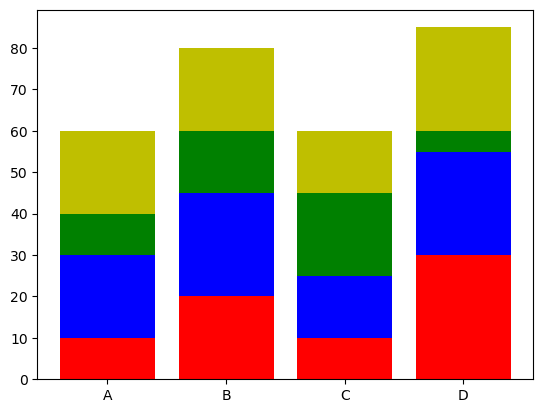

In [196]:
y3 = np.array([10,15,20,5])
y4 = np.array([20,20,15,25])

plt.bar(x,y1,color='r')
plt.bar(x,y2, bottom=y1,color='b')
plt.bar(x,y3, bottom=y1 + y2, color = 'g')
plt.bar(x,y4, bottom=y1+y2+y3, color = 'y')

plt.show()

In [197]:
sorted_df = df.sort_values(by='age')

sorted_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Name of Patient,Patient Aadhaar Number
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220,137.0,Sebastian,1.106976e+11
374,-0.107226,-0.044642,-0.034229,-0.067642,-0.063487,-0.070520,0.008142,-0.039493,-0.000612,-0.079778,140.0,James,8.968550e+11
344,-0.107226,-0.044642,-0.011595,-0.040099,0.049341,0.064447,-0.013948,0.034309,0.007027,-0.030072,200.0,William,5.339696e+11
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930,113.0,Robert,1.975373e+11
226,-0.103593,0.050680,-0.046085,-0.026328,-0.024960,-0.024800,0.030232,-0.039493,-0.039809,-0.054925,77.0,Grace,9.965153e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0,Alexander,5.067474e+11
311,0.096197,-0.044642,0.040140,-0.057313,0.045213,0.060690,-0.021311,0.036154,0.012551,0.023775,180.0,David,9.793179e+11
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,230.0,Jack,9.342981e+11
402,0.110727,0.050680,-0.033151,-0.022885,-0.004321,0.020293,-0.061809,0.071210,0.015568,0.044485,168.0,Jack,4.616927e+11


<Axes: xlabel='age', ylabel='bp'>

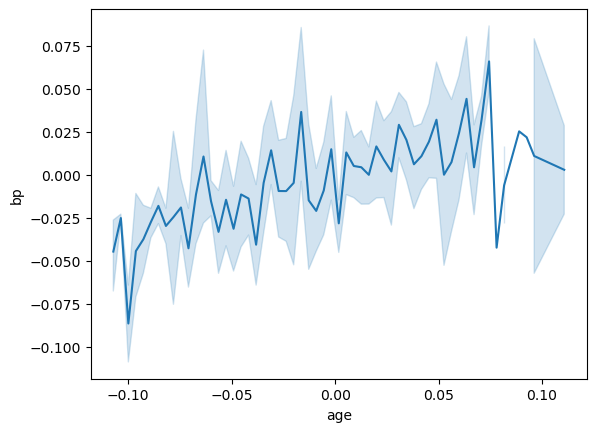

In [198]:
sns.lineplot(sorted_df, x='age', y='bp')

In [199]:
df = pd.read_csv('./archive/world-data-2023.csv')
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [200]:
# temp = df.sort_values(by='Population')
def handler(val, rep):
    if isinstance(val, str):
        return float(val.replace(rep,''))
    # print(f'returning {val} of type {type(val)} checked as: {math.isnan(val)}')
    if math.isnan(val):
        return val
    return float(val)
pop = np.array([handler(val,',') for val in temp['Population']])
temp['Population'] = pop

In [201]:
temp = temp.sort_values(by='Population')

<Axes: xlabel='Density\n(P/Km2)', ylabel='Population'>

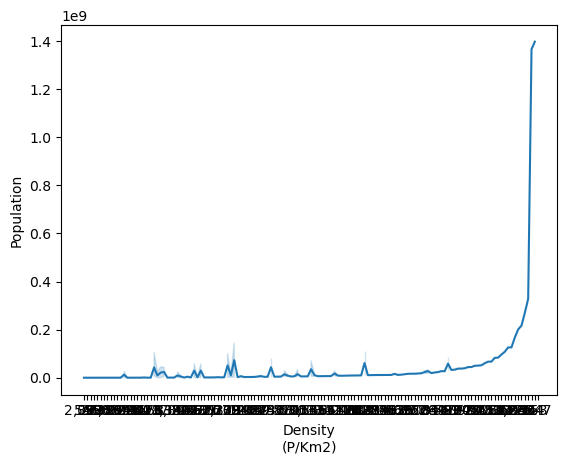

In [202]:
sns.lineplot(temp, y='Population', x='Density\n(P/Km2)')

<Axes: xlabel='Infant mortality', ylabel='Life expectancy'>

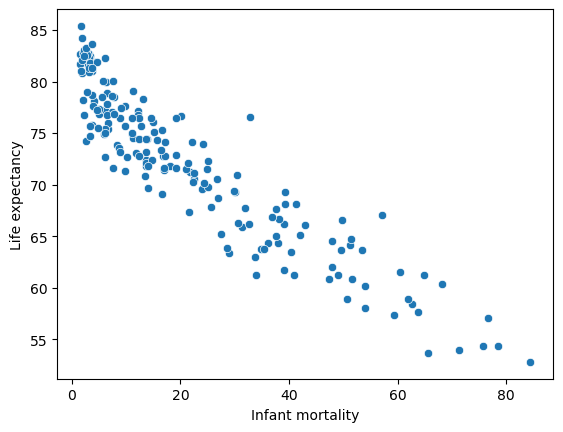

In [203]:
sns.scatterplot(df, x='Infant mortality', y='Life expectancy')

<Axes: xlabel='Tax revenue (%)', ylabel='Unemployment rate'>

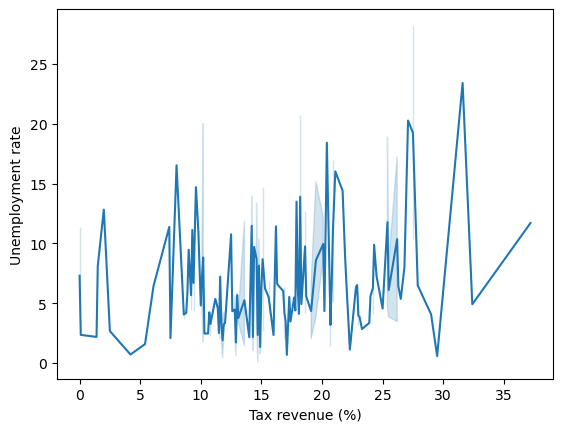

In [204]:
df_2 = df.copy()

df_2['Tax revenue (%)'] = [handler(val,'%') for val in df_2['Tax revenue (%)']]
df_2['Unemployment rate'] = [handler(val,'%') for val in df_2['Unemployment rate']]

sns.lineplot(df_2.sort_values(by='Unemployment rate'), x='Tax revenue (%)', y='Unemployment rate')

# df_2


In [207]:
dat = pd.read_csv('./zomato/zomato.csv')
dat

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


<Axes: xlabel='rate (out of 5)', ylabel='Count'>

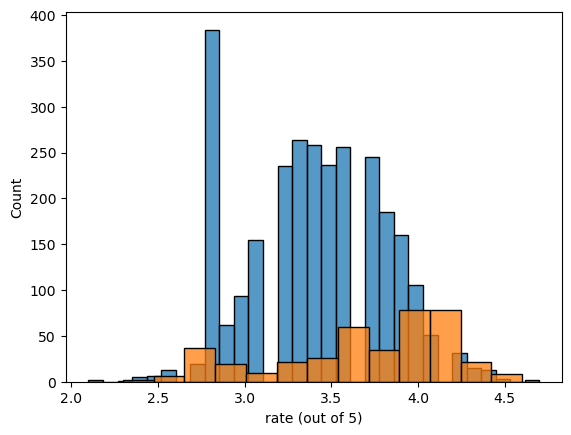

In [220]:
sns.histplot(dat[dat['restaurant type'] == 'Quick Bites'], x='rate (out of 5)')
sns.histplot(dat[dat['restaurant type'] == 'Cafe'], x='rate (out of 5)')

<Axes: xlabel='online_order', ylabel='num of ratings'>

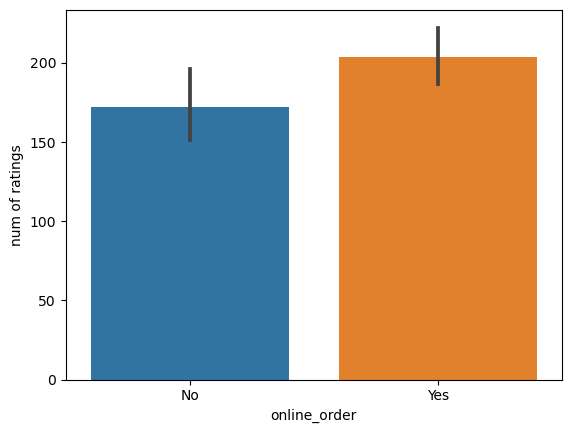

In [226]:
sns.barplot(dat, x='online_order', y='num of ratings')

<Axes: xlabel='table booking', ylabel='num of ratings'>

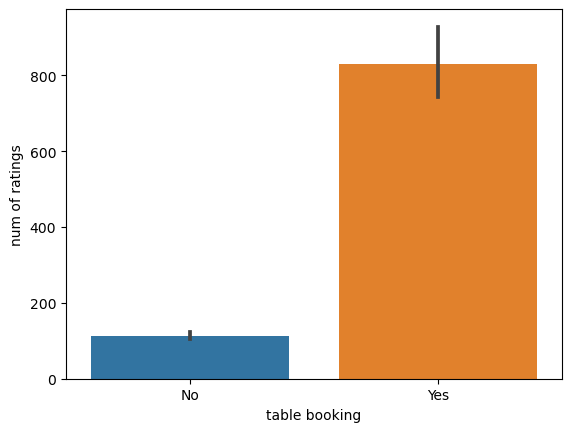

In [227]:
sns.barplot(dat, x='table booking', y='num of ratings')

<Axes: xlabel='table booking', ylabel='rate (out of 5)'>

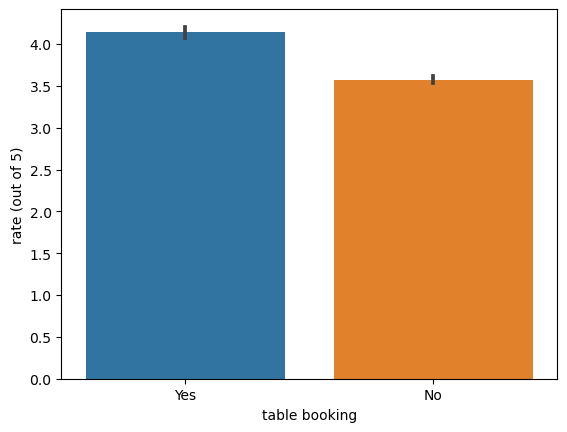

In [234]:
sns.barplot(dat[dat['area'] == 'Brigade Road'], x='table booking', y='rate (out of 5)')

<Axes: xlabel='table booking', ylabel='rate (out of 5)'>

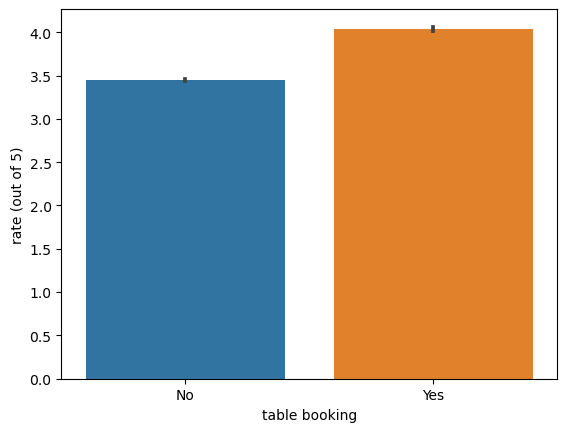

In [230]:
sns.barplot(dat, x='table booking', y='rate (out of 5)')


<Axes: xlabel='avg cost (two people)', ylabel='rate (out of 5)'>

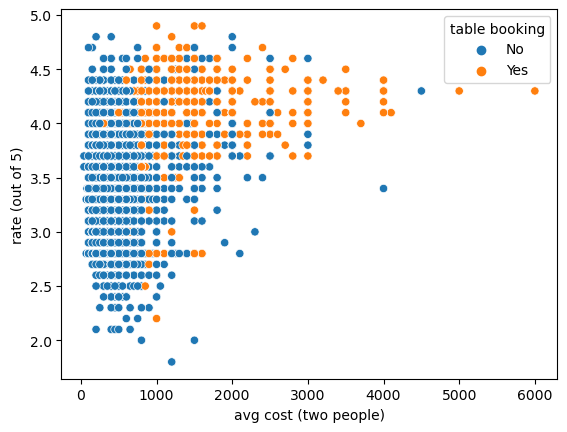

In [237]:
sns.scatterplot(dat, x='avg cost (two people)', y='rate (out of 5)', hue='table booking')

<Axes: xlabel='online_order', ylabel='rate (out of 5)'>

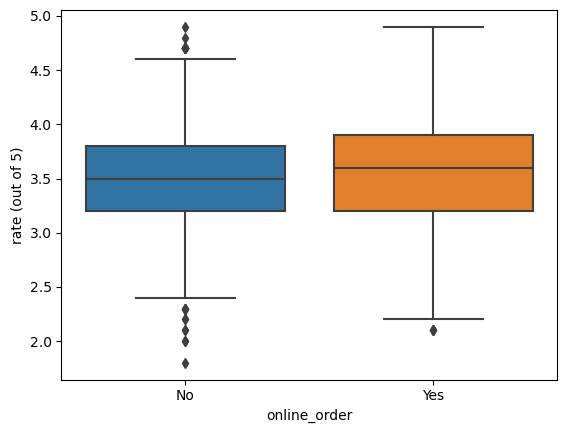

In [240]:
sns.boxplot(dat, y='rate (out of 5)', x='online_order')